House price pridiction


Import libraries

In [15]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns


In [16]:
import os
os.getcwd()


'c:\\Users\\purni\\OneDrive\\Desktop\\mini project'

Assign the given data

In [17]:
data = pd.read_csv("Hyderabad_House_Data .csv")




print column names

In [18]:
data.columns

Index(['Unnamed: 0', 'Bedrooms', 'Washrooms', 'Furnishing', 'Tennants', 'Area',
       'Price', 'Locality'],
      dtype='object')

print last 5 values in the given dataset

In [19]:
data.tail()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
1166,1166,2 BHK Apartment,1,Unfurnished,Family,900 sqft,"15,000",KPHB Road
1167,1167,1 BHK Apartment,1,Semi-Furnished,Bachelors/Family,East Facing Property,"10,000","Miyapur, NH"
1168,1168,3 BHK Apartment,1,Unfurnished,Bachelors,1515 sqft,"14,000","Pragathi Nagar, Kukatpally"
1169,1169,3 BHK Apartment,From Nov '19,Family,3,1500 sqft,"16,000","Habsiguda, NH"
1170,1170,2 BHK Apartment,2,Semi-Furnished,Bachelors/Family,1100 sqft,"12,000","Umas Aadya and Arha Mensions, Kukatpally, NH"


print the last 5 values

In [20]:
data.head()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,2,1 BHK Builder Floor,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3,3 BHK Apartment,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur


preprocessing

In [21]:
data.shape

(1171, 8)

print mathmatical values

In [22]:
data.describe()

,Unnamed: 0
count,1171.000000
mean,585.000000
std,338.182889
min,0.000000
25%,292.500000
50%,585.000000
75%,877.500000
max,1170.000000


In [23]:
data.isnull().sum()

Unnamed: 0     0
Bedrooms       0
Washrooms     21
Furnishing     0
Tennants       1
Area          22
Price          0
Locality       0
dtype: int64

converting null values into numerical

In [24]:
data['Washrooms']=pd.to_numeric(data['Washrooms'],errors='coerce')


In [25]:
data["Washrooms"]=data["Washrooms"].fillna(data["Washrooms"].median() )

In [26]:
data['Tennants']=pd.to_numeric(data['Tennants'],errors='coerce')


In [27]:
data.index

RangeIndex(start=0, stop=1171, step=1)

In [28]:
data['Price']

0       34,000
1       45,000
2       18,000
3       40,000
4       23,000
         ...  
1166    15,000
1167    10,000
1168    14,000
1169    16,000
1170    12,000
Name: Price, Length: 1171, dtype: object

In [29]:
data["Tennants"]=data["Tennants"].fillna(data["Tennants"].median() )

In [30]:
data.isnull().sum()

Unnamed: 0     0
Bedrooms       0
Washrooms      0
Furnishing     0
Tennants       0
Area          22
Price          0
Locality       0
dtype: int64

In [31]:
data[["Washrooms","Area"]].isnull().sum()

Washrooms     0
Area         22
dtype: int64

In [32]:
data["Area"] = data["Area"].astype(str).str.extract("(\d+)")

In [33]:
data["Area"] = pd.to_numeric(data["Area"],errors = "coerce")

In [34]:
data["Area"]=data["Area"].fillna(data["Area"].median() )

In [35]:
data["Price"] = data["Price"].astype(str).str.replace(r"[^\d]","",regex = True)

In [36]:
data["Price"] = data["Price"].astype(float)

In [37]:
data["Price"].dtype

dtype('float64')

In [38]:
data["Price"].apply(type).value_counts()

Price
<class 'float'>    1171
Name: count, dtype: int64

In [39]:
x = data.drop("Price",axis=1)
y = data["Price"]

In [40]:
x=pd.get_dummies(x,drop_first=True)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled,y,test_size=0.2, random_state=42
)


In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
print(x_train.dtype)
print(y_train.dtype)

float64
float64


In [45]:
y_pred=model.predict(x_test)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [47]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R^2 SCORE:",r2)


MAE: 5380.825496537841
MSE: 53398077.53526923
RMSE: 7307.398821418551
R^2 SCORE: 0.558235307243758


In [48]:
new_house = pd.DataFrame({
    'Area' : [1400],
    'Bedrooms' : [6],
    'Washrooms' : [3]
})

new_house = pd.get_dummies(new_house)
new_house = new_house.reindex(columns=x.columns, fill_value=0)

new_scaled = scaler.transform(new_house)

predicted_price = model.predict(new_scaled)
print("predicted House Price:",predicted_price[0])

predicted House Price: 22059.542898483247


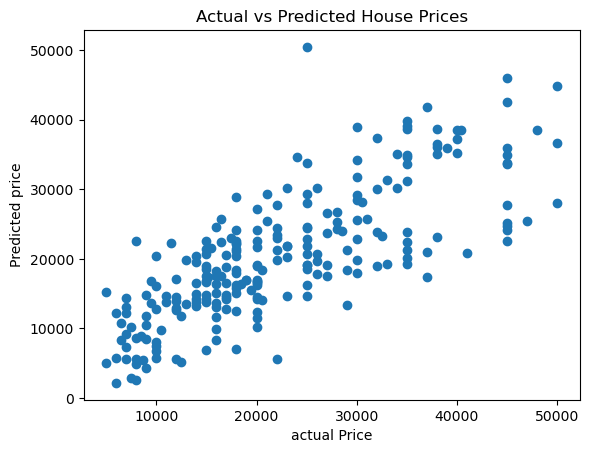

In [49]:
plt.scatter(y_test, y_pred)
plt.xlabel("actual Price")
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [53]:
import pickle

with open("model.pkl", "rb") as f:
    model = pickle.load(f)


In [54]:
import joblib

joblib.dump(model,
r"C:\Users\purni\OneDrive\Desktop\mini project\house_price_model.pkl")


['C:\\Users\\purni\\OneDrive\\Desktop\\mini project\\house_price_model.pkl']

In [55]:
from sklearn.preprocessing import LabelEncoder
import joblib

furnishing_encoder = LabelEncoder()
data['Furnishing'] = furnishing_encoder.fit_transform(data['Furnishing'])

locality_encoder = LabelEncoder()
data['Locality'] = locality_encoder.fit_transform(data['Locality'])
